# Project: Investigate and Analysis a CSV Dataset "IT Salary Survey for EU region (2020)"

Data Link:  https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region

## Table of Contents
<ul>
<li><a href="#intro">Background Information about participants in the survey</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Background Information about participants in the survey

> In this project, we will delve into the world of data analysis by exploring and analyzing a challenging open-source Kaggle dataset. The goal of this project is to showcase the process of loading, cleaning, exploring, and analyzing data using pandas with a more challenging dataset.

### Dataset Description 
>For this project, we have selected the IT Salary Survey for EU region available on Kaggle. This dataset contains information about the salary patterns among the IT professionals in the EU region and offers some great insights.

* `time:` Timestamp
* `age:` Age
* `gender:` Gender
* `city:` City
* `position:` Position
* `tot_exp:` Total years of experience
* `tot_exp_german:` Years of experience in Germany
* `sen_level:` Seniority level
* `main_tech:` Your main technology / programming language
* `other_tech:` Other technologies/programming languages you use often
* `salary_EUR:` Yearly brutto salary (without bonus and stocks) in EUR
* `bonus_stocks_EUR:` Yearly bonus + stocks in EUR
* `salary_last_year_EUR:` Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country
* `bonus_stocks_last_year_EUR:` Annual bonus+stocks one year ago. Only answer if staying in same country
* `vac_days:` Number of vacation days
* `emp_status:` Employment status
* `cont_duration:` Сontract duration
* `main_lang:` Main language at work
* `company_size:` Company size
* `company_type:` Company type(Domain)
* `lost_job_COVID:` Have you lost your job due to the coronavirus outbreak?
* `kurzarbeit_hours:` Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week
* `wfhome_support:` Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR

### Question(s) for Analysis
>- Age distribution by gender
>- Gender and Number of Vacation Day
>- Salary plot
>- How Big Are The Companies In Europe ?
>- How safe Are The Opportunites in Europe ?
>- Which Language Should You Use There ?
>- What Are The Most Popular 3 Technologies Per Each top10 Position ?
>- What type of work makes more money?
>- Which Work Level Get More Vacation ?
>- Which City has The Highest Chance To Get a IT Opportunity?
>- Which city has the highest (average) salary?
>- Which Age Has The Highest Chance To Get an IT Opportunity ?
>- Is the age proportional to the salary?
>- What is The most Common Work Level ?
>- Is the number of years of experience proportional to the salary?
>- What is the average salary for men and women and how does it relate to Covid-19?
>- Which tech-savvy workers earn the highest wages?
>- Which programming language is most commonly used?
>- Which city has the highest number of members?
>- What technology do people with more experience often use?

In [1]:
# Importing libaries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer

from collections import Counter

<a id='wrangling'></a>
## Data Wrangling
> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**

In [2]:
#loading data into workspace
df = pd.read_csv("IT Salary Survey EU  2020.csv")
pd.set_option('display.max_columns', None)

In [3]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [4]:
#Renaming columns
df.columns = ["time", "age", "gender", "city", "position", "tot_exp", "tot_exp_german", "sen_level",
"main_tech", "other_tech", "salary_EUR", "bonus_stocks_EUR", "salary_last_year_EUR", "bonus_stocks_last_year_EUR", "vac_days",
"emp_status", "cont_duration", "main_lang", "company_size", "company_type", "lost_job_COVID", "kurzarbeit_hours", "wfhome_support"]


In [5]:
# Dimension of the Data
df.shape

(1253, 23)

In [6]:
#dropping duplicates
df=df.drop_duplicates()

In [7]:
df.head(4)

,time,age,gender,city,position,tot_exp,tot_exp_german,sen_level,main_tech,other_tech,salary_EUR,bonus_stocks_EUR,salary_last_year_EUR,bonus_stocks_last_year_EUR,vac_days,emp_status,cont_duration,main_lang,company_size,company_type,lost_job_COVID,kurzarbeit_hours,wfhome_support
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN


In [8]:
#Check the information concerning data types of each columns and general infromative and desctriptive information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time                        1253 non-null   object 
 1   age                         1226 non-null   float64
 2   gender                      1243 non-null   object 
 3   city                        1253 non-null   object 
 4   position                    1247 non-null   object 
 5   tot_exp                     1237 non-null   object 
 6   tot_exp_german              1221 non-null   object 
 7   sen_level                   1241 non-null   object 
 8   main_tech                   1126 non-null   object 
 9   other_tech                  1096 non-null   object 
 10  salary_EUR                  1253 non-null   float64
 11  bonus_stocks_EUR            829 non-null    object 
 12  salary_last_year_EUR        885 non-null    float64
 13  bonus_stocks_last_year_EUR  614 n

In [9]:
#Convert time column to Datetime
df['time'] = pd.to_datetime(df['time']).dt.year

In [10]:
# Checking uniqe value counts for 
print('\n',"Position: ",df['position'].nunique(),'\n',
      "City: ",df['city'].nunique(),'\n',
      "Total Experience: ",df['tot_exp'].nunique(),'\n',
      "Seniroity Level: ",df['sen_level'].nunique(),'\n',
      "Vacation Days: ",df['vac_days'].nunique(),'\n',
      "Main Lang.: ",df['main_lang'].nunique(),'\n',
      "COVID job lost: ",df['lost_job_COVID'].nunique(),'\n',
      "Main Tech.: ",df['main_tech'].nunique(),'\n',
      "Contact Duration: ",df['cont_duration'].nunique(),'\n')


 Position:  148 
 City:  119 
 Total Experience:  48 
 Seniroity Level:  24 
 Vacation Days:  45 
 Main Lang.:  14 
 COVID job lost:  10 
 Main Tech.:  256 
 Contact Duration:  3 



In [11]:
mapping = {'Dana Analyst':'Data Analyst',
           'Databengineer':'Data Engineer',
           'Fullstack Engineer, Ну Или Software Engineer':'Fullstack Engineer / Software Engineer',
           'Full-Stack Developer':'Fullstack Developer',
           'Software Architekt':'Software Architect',
           'Solutions Architect':'Solution Architect',
           'Systemadministrator':'System Administrator',
           'Teamlead':'Team Lead',
           'Testmanager':'Test Manager',
           'Testautomation': 'Test Automation',
           
           'Nurnberg': 'Nuremberg',
           'Kiev': 'Kyiv',
           'Koln':'Cologne',
           'Den Haag':'The Haag',
           'Cracovia':'Krakow',
           'Bolingen':'Bollingen',
           'Braunschweig':'Brunswick',
           'Sevilla':'Seville',
           'Saint-Petersburg':'Saint Petersburg',
           'Dusseldurf':'Dusseldorf',
           'Duesseldorf':'Dusseldorf'}
df = df.applymap(lambda x:  x.strip().title() if isinstance(x, str) else x)

df[['position', 'city']] = df[['position', 'city']].replace(mapping).replace({'city': {'ü': 'u', 'ö': 'o', 'ń': 'n'}}, regex=True)

In [12]:
## Cleaning Years of Experience 
df['tot_exp'] = (
    df['tot_exp'].astype(str)
    .str.replace(r',', '.', regex=True)
    .str.replace(r'6 \(Not As A Data Scientist. But As A Lab Scientist\)', '6', regex=True)
    .str.replace(r'15\. Thereof 8 As Cto', '15', regex=True)
    .str.replace(r'1 \(As Qa Engineer\) / 11 In Total', '11', regex=True)
    .str.replace(r'Less Than Year', '1', regex=True)
    .astype(float)
    )

In [13]:
## Cleaning Seniority Level
df['sen_level'] = df['sen_level'].replace(mapping)
df=df.replace({'sen_level': {'Student':'Junior',
                             'Intern':'Junior',
                             'Working Student':'Junior',
                             'Entry Level':'Junior',
                             
                             'Cto':'Senior',
                             'Work Center Manager':'Senior',
                             'Manager':'Senior',
                             'Vp':'Senior',                             
                             'Director':'Senior',
                             'C-Level Executive Manager':'Senior',                             
                             'Lead': 'Senior',
                             'Head': 'Senior',
                             'Principal':'Senior',
                             'C-Level':'Senior',
                             
                             'No Idea, There Are No Ranges In The Firm':float("NaN"),
                             'Key': float("NaN"),
                             'No Level':float("NaN")}})

In [14]:
## Cleaning Vacation Days 
df=df.replace({'vac_days': {'23+': '23',
                            '24 Labour Days': '24',
                            '~25':'25',
                            '30 In Contract (But Theoretically Unlimited)':'365',
                            'Unlimited':'365',
                            '(No Idea)':float("NaN"),
                            'Na':float("NaN"),}})
df['vac_days'] = df['vac_days'].astype(float)

In [15]:
## Cleaning Language column
df = df.replace({'main_lang': {'English And German': 'Multiple', 
                                            'Deutsch':'German',
                                            'Русский': 'Russian',
                                            '50/50': 'Multiple',
                                            'Deuglisch': 'German',
                                            'Both': 'Multiple',
                                            'Russian, English': 'Multiple'}})

In [16]:
## Cleaning COVID column 
df=df.replace({'lost_job_COVID': {"I Didn'T But Will Be Looking For New One Because Of Covid": 'No',
                                  'Kurzarbeitzeit For 1.5 Months': 'No',
                                  'Lost The Job But For Different Reason':'No',
                                  'Yes But Found A New One With Better Pay / Perks':'Yes',
                                  'No, But There Was A Salary Cut At 10% For 3 Months And Then At 5% For Further 3 Months':'No',
                                  'Leads And Project Inquiries Have Slowed Down':'No',
                                  'Have Been A Freelancer At The Beginning Of Year':'Yes',
                                  'Laid Off For A Bit':'Yes'}})

In [17]:
df = df.replace({'main_tech':{'--':'Python',
                            '-':'Python',}})
df = df.replace({'cont_duration':{'0':float("NaN")}})

In [18]:
# Checking uniqe value counts for 
print('\n',"Position: ",df['position'].nunique(),'\n',
      "City: ",df['city'].nunique(),'\n',
      "Total Experience: ",df['tot_exp'].nunique(),'\n',
      "Seniroity Level: ",df['sen_level'].nunique(),'\n',
      "Vacation Days: ",df['vac_days'].nunique(),'\n',
      "Main Lang.: ",df['main_lang'].nunique(),'\n',
      "COVID job lost: ",df['lost_job_COVID'].nunique(),'\n',
      "Main Tech.: ",df['main_tech'].nunique(),'\n',
      "Contact Duration: ",df['cont_duration'].nunique(),'\n')


 Position:  125 
 City:  101 
 Total Experience:  42 
 Seniroity Level:  4 
 Vacation Days:  36 
 Main Lang.:  9 
 COVID job lost:  2 
 Main Tech.:  206 
 Contact Duration:  2 



In [19]:
df.shape

(1253, 23)

### NaN Check

In [20]:
# Checking for NaN value
df.isna().sum()

time                            0
age                            27
gender                         10
city                            0
position                        6
tot_exp                        16
tot_exp_german                 32
sen_level                      16
main_tech                     127
other_tech                    157
salary_EUR                      0
bonus_stocks_EUR              424
salary_last_year_EUR          368
bonus_stocks_last_year_EUR    639
vac_days                       69
emp_status                     17
cont_duration                  30
main_lang                      16
company_size                   18
company_type                   25
lost_job_COVID                 20
kurzarbeit_hours              880
wfhome_support                791
dtype: int64

In [21]:
# Checking for NaN value (percentage)
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

time                           0.00
age                            2.15
gender                         0.80
city                           0.00
position                       0.48
tot_exp                        1.28
tot_exp_german                 2.55
sen_level                      1.28
main_tech                     10.14
other_tech                    12.53
salary_EUR                     0.00
bonus_stocks_EUR              33.84
salary_last_year_EUR          29.37
bonus_stocks_last_year_EUR    51.00
vac_days                       5.51
emp_status                     1.36
cont_duration                  2.39
main_lang                      1.28
company_size                   1.44
company_type                   2.00
lost_job_COVID                 1.60
kurzarbeit_hours              70.23
wfhome_support                63.13
dtype: float64

In [22]:
#Deleting columns with Nan value greater than 80%
df = df.drop(columns = ['bonus_stocks_last_year_EUR', 
                        'kurzarbeit_hours',
                        'wfhome_support',
                        'salary_last_year_EUR',
                        'bonus_stocks_EUR',
                        'tot_exp_german'])

In [23]:
#Check the information concerning data types of each columns and general infromative and desctriptive information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1252
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            1253 non-null   int64  
 1   age             1226 non-null   float64
 2   gender          1243 non-null   object 
 3   city            1253 non-null   object 
 4   position        1247 non-null   object 
 5   tot_exp         1237 non-null   float64
 6   sen_level       1237 non-null   object 
 7   main_tech       1126 non-null   object 
 8   other_tech      1096 non-null   object 
 9   salary_EUR      1253 non-null   float64
 10  vac_days        1184 non-null   float64
 11  emp_status      1236 non-null   object 
 12  cont_duration   1223 non-null   object 
 13  main_lang       1237 non-null   object 
 14  company_size    1235 non-null   object 
 15  company_type    1228 non-null   object 
 16  lost_job_COVID  1233 non-null   object 
dtypes: float64(4), int64(1), object(1

### Fill Nan Values

array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'tot_exp'}>,
        <AxesSubplot:title={'center':'salary_EUR'}>],
       [<AxesSubplot:title={'center':'vac_days'}>, <AxesSubplot:>]],
      dtype=object)

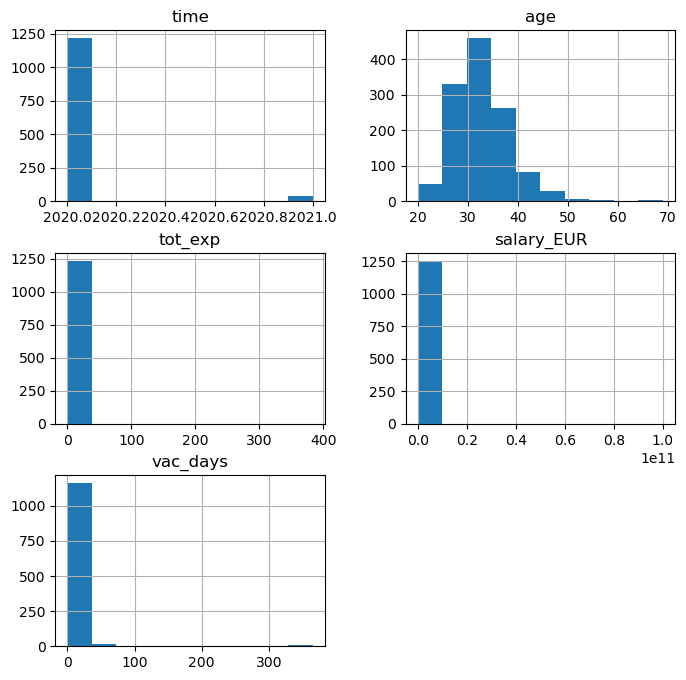

In [24]:
#Check the distribution of the features of the dataframe
df.hist(figsize = (8, 8))

In [25]:
# numeric columns that have nan value
numeric_cols_with_nan = list(df.select_dtypes(exclude='object').columns[df.select_dtypes(exclude='object').isna().any()])

# categorical columns that have nan value
object_cols_with_nan = list(df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isna().any()])

In [26]:
# separate into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
# create a median and mode imputer
median_imputer = MeanMedianImputer(imputation_method='median',variables = numeric_cols_with_nan)
mode_imputer = CategoricalImputer(imputation_method='frequent', variables=object_cols_with_nan)

# fit
median_imputer.fit(train_data)
mode_imputer.fit(train_data)

# transform the data
X_train = median_imputer.transform(train_data)
X_train = mode_imputer.transform(X_train)
X_test = median_imputer.transform(test_data)
X_test = mode_imputer.transform(X_test)

In [28]:
df = pd.concat([X_train,X_test], axis=0)
df = df.reset_index(drop=True)
df.shape

(1253, 17)

In [29]:
# check that null values were replaced
df.isnull().mean()

time              0.0
age               0.0
gender            0.0
city              0.0
position          0.0
tot_exp           0.0
sen_level         0.0
main_tech         0.0
other_tech        0.0
salary_EUR        0.0
vac_days          0.0
emp_status        0.0
cont_duration     0.0
main_lang         0.0
company_size      0.0
company_type      0.0
lost_job_COVID    0.0
dtype: float64

In [30]:
# show mode for all numerical columns
df.mode(numeric_only=True)

,time,age,tot_exp,salary_EUR,vac_days
0,2020,32.0,10.0,60000.0,30.0


In [31]:
df.describe().round()

,time,age,tot_exp,salary_EUR,vac_days
count,1253.0,1253.0,1253.0,1.253000e+03,1253.0
mean,2020.0,32.0,9.0,8.027904e+07,31.0
std,0.0,6.0,12.0,2.825061e+09,30.0
min,2020.0,20.0,0.0,1.000100e+04,0.0
25%,2020.0,29.0,5.0,5.880000e+04,27.0
50%,2020.0,32.0,8.0,7.000000e+04,28.0
75%,2020.0,35.0,12.0,8.000000e+04,30.0
max,2021.0,69.0,383.0,1.000000e+11,365.0


In [32]:
df.describe(exclude='number')

,gender,city,position,sen_level,main_tech,other_tech,emp_status,cont_duration,main_lang,company_size,company_type,lost_job_COVID
count,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253
unique,3,101,125,4,206,561,10,2,9,5,57,2
top,Male,Berlin,Software Engineer,Senior,Python,Javascript / Typescript,Full-Time Employee,Unlimited Contract,English,1000+,Product,No
freq,1059,681,393,801,341,201,1207,1189,1036,466,785,1187


From the description of the dataset. some notable features would be:
* The predence of 20 as the minimum age, and 69 as the maximum age
* Mean of vacation days is 31
* Maximum total experience is 383
* There are more males than females in the dataset.
* Contract duration of most people is Unlimited Contract and they works as Software Engineer
* The main programming language is Python

In [33]:
# Cleaning of outliers
list_of_columns = ['age', 'tot_exp', 'salary_EUR', 'vac_days']

def clean_out(df,feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    
    df = df[(df[feature] > lower_limit) & (df[feature] < upper_limit)]
    
    return df

for feature in list_of_columns:
    df = clean_out(df,feature)

In [34]:
#A copy of the actual data incase something gets deprecated
df_1 = df.copy()

<a id='eda'></a>
## Exploratory data analysis

### Age distribution by gender

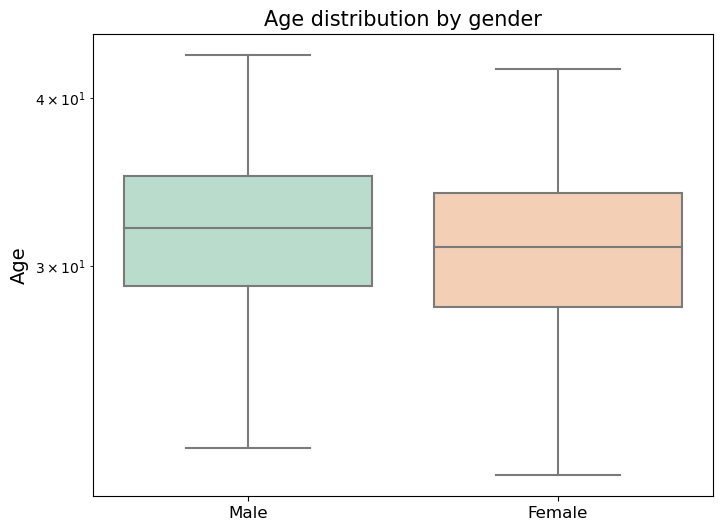

In [35]:
# Plotting the Boxplots
plt.figure(figsize=(8,6))

sns.boxplot(x='gender',y='age',data=df_1,palette='Pastel2')

plt.xticks(fontsize=12)
plt.xlabel("")
plt.yticks(fontsize=12)
plt.ylabel("Age",fontsize=14)
plt.title('Age distribution by gender',fontsize=15)

plt.yscale('log')
plt.show()

**Insights:** In general, more men than women work in the department

### Gender and Number of Vacation Day

C:\Users\ACER\anaconda3\envs\requirements\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\envs\requirements\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\envs\requirements\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\envs\requirements\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


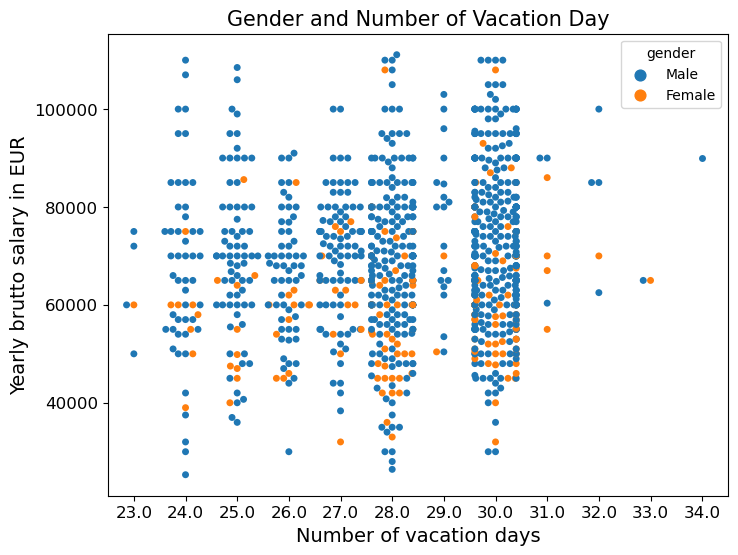

In [36]:
plt.figure(figsize=(8,6))
sns.swarmplot(y='salary_EUR',x='vac_days',
            data=df_1, hue='gender')

plt.xticks(fontsize=12)
plt.xlabel("Number of vacation days",fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Yearly brutto salary in EUR",fontsize=14)
plt.title('Gender and Number of Vacation Day',fontsize=15)

plt.show()

**Insights:** The Most of the employees in the department are 30 years old, with annual gross salaries of over 60,000.

### Salary plot

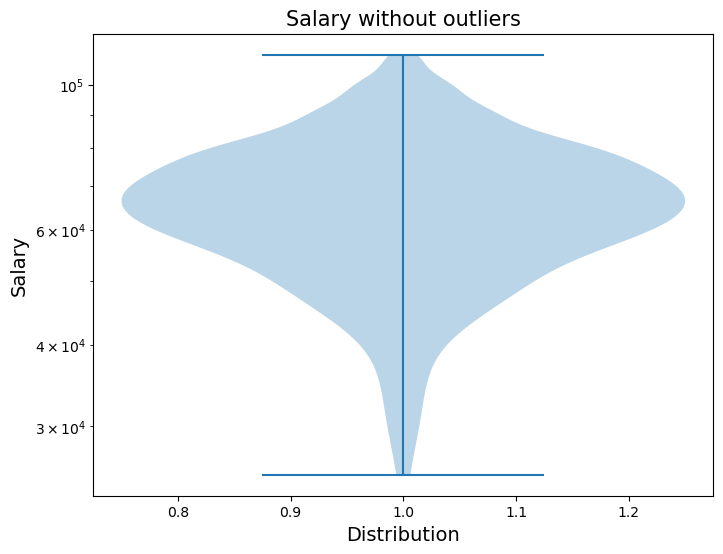

In [37]:
# create subplots for age and ageOUT
plt.figure(figsize=(8,6))

plt.violinplot(df_1['salary_EUR'])

plt.title('Salary without outliers',fontsize=15)
plt.ylabel('Salary',fontsize=14)
plt.xlabel('Distribution',fontsize=14)
plt.yscale('log')
plt.show()


## EDA Questions&Answers

### 1) How Big Are The Companies In Europe ?

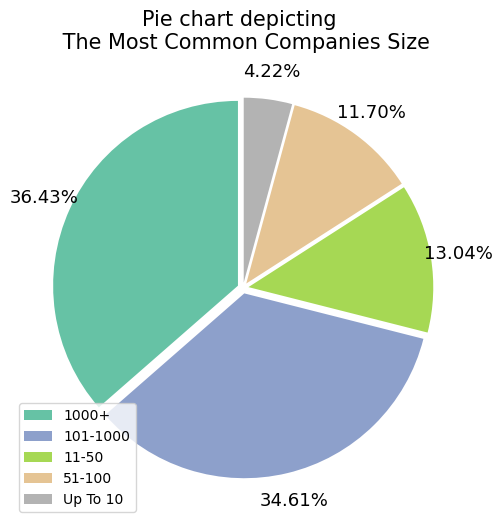

In [38]:
plt.figure(figsize=(8,6))

df_1['company_size'].value_counts().plot.pie(autopct="%1.2f%%",fontsize=13,startangle=90,labels=['']*5,
                                         cmap='Set2',explode=[0.03] * 5,pctdistance=1.15)

plt.title("Pie chart depicting \n The Most Common Companies Size",fontsize=15);
plt.ylabel("",fontsize=14)
plt.legend(loc='lower left',labels=df['company_size'].value_counts().index)
plt.show()

**Insights:** Companies with a company size of 1000+ are superior.

### 2) How safe Are The Opportunites in Europe ?

In [39]:
df_1['cont_duration'].value_counts()

Unlimited Contract    1008
Temporary Contract      35
Name: cont_duration, dtype: int64

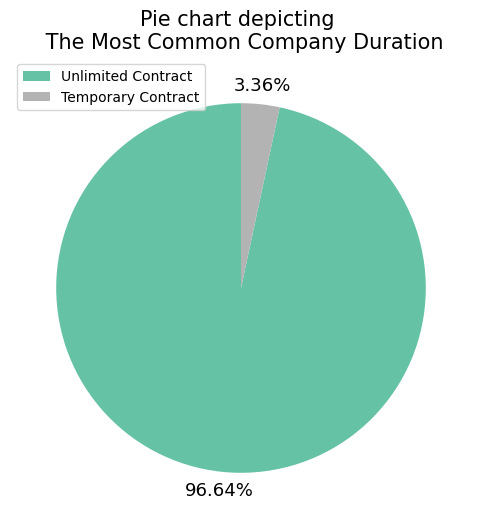

In [40]:
plt.figure(figsize=(8,6))

df_1['cont_duration'].value_counts().plot.pie(autopct="%1.2f%%",fontsize=13,startangle=90,labels=['']*4,
                                          cmap='Set2',pctdistance=1.1)

plt.title("Pie chart depicting \n The Most Common Company Duration",fontsize=15);
plt.ylabel("",fontsize=14)
plt.legend(loc='upper left',labels=df['cont_duration'].value_counts().index)
plt.show()

**Insights:** The most advantageous contract duration is unlimited contract.

### 3) Which Language Should You Use There ?


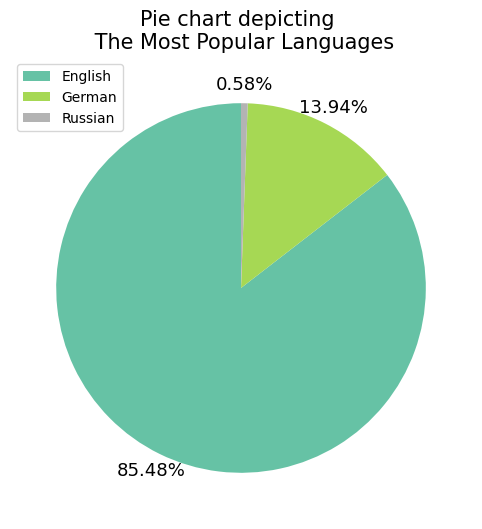

In [41]:
plt.figure(figsize=(8,6))
df_1['main_lang'].value_counts()[:3].plot.pie(autopct="%1.2f%%",fontsize=13,startangle=90,labels=['']*5,
                                         cmap='Set2', pctdistance=1.1)

plt.title("Pie chart depicting \n The Most Popular Languages",fontsize=15);
plt.ylabel("",fontsize=14)
plt.legend(loc='upper left',labels=df['main_lang'].value_counts().index)
plt.show()

**Insights:** Most of the employees know English better than any other language.

### 4) What Are The Most Popular 3 Technologies Per Each top10 Position ?

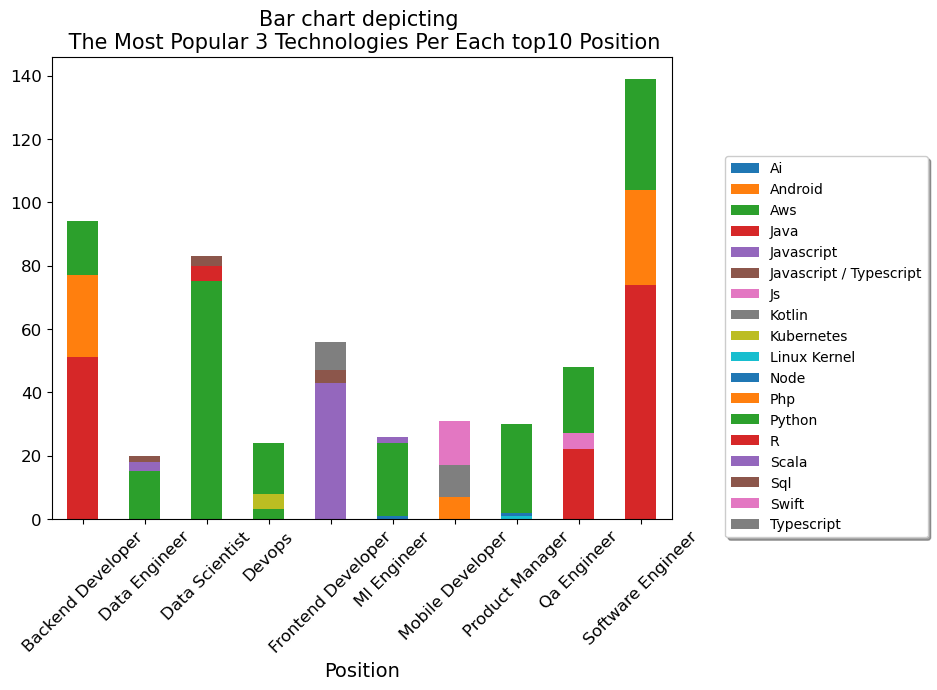

In [42]:
# Select the top 10 positions based on value counts
list_ = list(df_1["position"].value_counts()[:10].index)

# Filter the DataFrame based on the selected positions
filtered_df = df_1[df_1["position"].isin(list_)]

# Group the data by position and main technology, and count the occurrences
grouped_df = pd.DataFrame(filtered_df.groupby('position')['main_tech'].value_counts().reset_index(level='position'))

# Get the top three main technologies for each position and Create a stacked bar plot
top_techs = grouped_df.groupby('position')['main_tech'].nlargest(3)

# Create a stacked bar plot
(top_techs.unstack()).plot(kind="bar", stacked=True, figsize=(8, 6))

handles, labels = plt.gca().get_legend_handles_labels()

# Create the modified legend
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)

plt.title("Bar chart depicting \n The Most Popular 3 Technologies Per Each top10 Position",fontsize=15);
plt.xticks(fontsize=12,rotation=45)
plt.xlabel("Position",fontsize=14)
plt.yticks(fontsize=12)
# Display the plot
plt.show()

**Insights:** Looking at the graph, Python and AWS are more used than others.

### 5) What type of work makes more money?

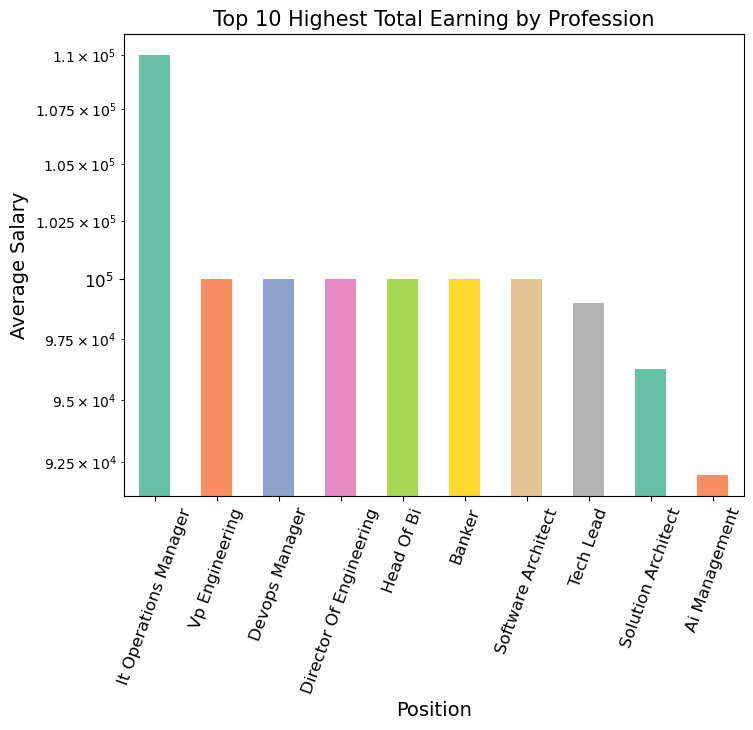

In [43]:
# Top 10 Highest Total Earning by Profession
position_earning = (df_1.groupby('position')['salary_EUR'].mean().sort_values(ascending=False))[:10]

# Define a custom color palette
custom_palette = sns.color_palette("Set2")[:10]

# Plotting the data
plt.figure(figsize=(8,6))

position_earning.plot(kind='bar', color=custom_palette)

# Adding labels and title
plt.xticks(rotation=70,fontsize=12)
plt.xlabel('Position',fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Average Salary',fontsize=14)
plt.title('Top 10 Highest Total Earning by Profession',fontsize=15)
plt.yscale('log')

# Displaying the plot
plt.show()


**Insights:** The profession with the highest annual salary is IT operations manager.

### 6) Which Work Level Get More Vacation ?

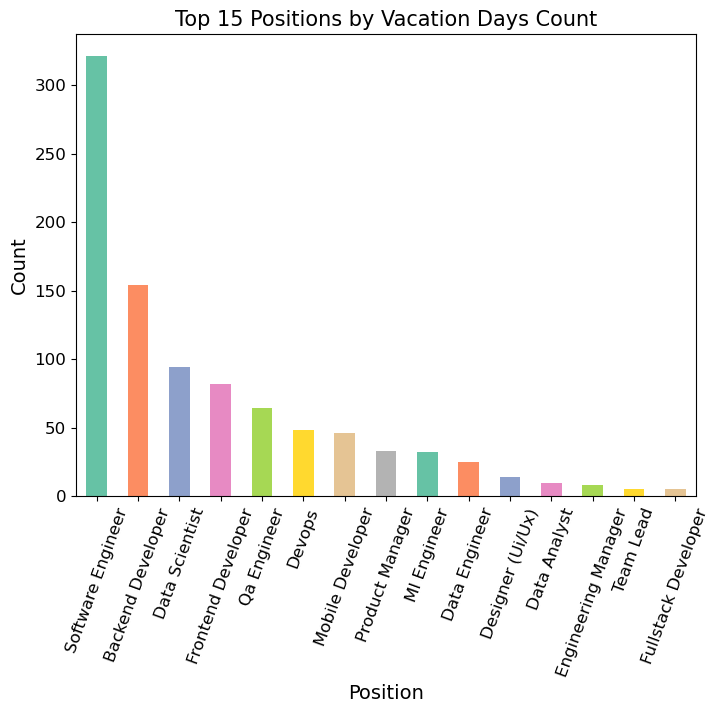

In [44]:
# Assuming you have the result stored in a variable called 'result'
vac_df = df_1.groupby('position')['vac_days'].count().sort_values(ascending=False)[:15]

# Define a custom color palette
custom_palette = sns.color_palette("Set2")[:15]

# Plotting the data
plt.figure(figsize=(8, 6))
vac_df.plot(kind='bar', color=custom_palette)

# Adding labels and title
plt.xticks(rotation=70,fontsize=12)
plt.xlabel('Position',fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Count',fontsize=14)
plt.title('Top 15 Positions by Vacation Days Count',fontsize=15)

# Displaying the plot
plt.show()

**Insights:** According to Vacation day, the top three are divided by Software Engineer, Backend developer and Data Scientist.

### 7) Which City has The Highest Chance To Get a IT Opportunity?


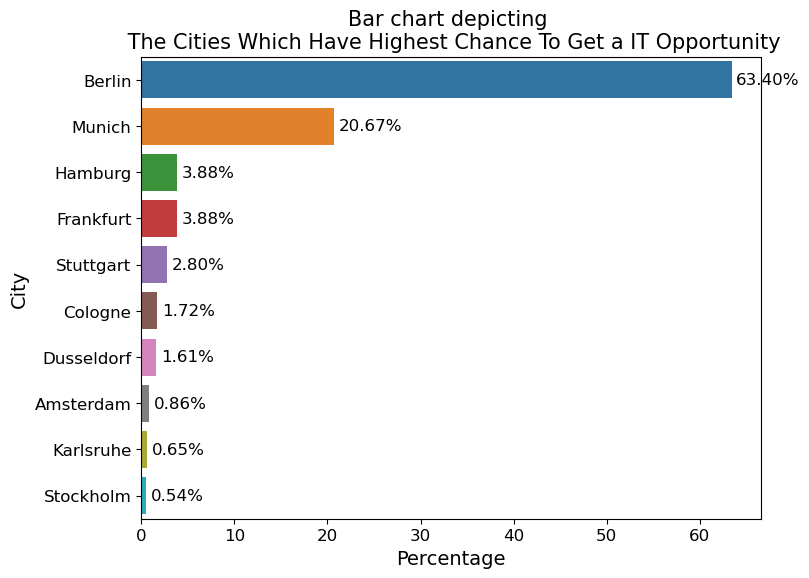

In [45]:
plt.figure(figsize=(8, 6))
city_counts = df_1['city'].value_counts().head(10)
city_percentages = (city_counts / city_counts.sum()) * 100

ax = sns.barplot(data=city_percentages.reset_index(), y='index', x='city')

plt.title("Bar chart depicting \n The Cities Which Have Highest Chance To Get a IT Opportunity",fontsize=15);

plt.xticks(fontsize=12)
plt.xlabel("Percentage", fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("City", fontsize=14)

# Add percentage values on the bars
for i, value in enumerate(city_percentages):
    ax.text(value+0.5, i, f'{value:.2f}%', va='center', fontsize=12)

plt.show()

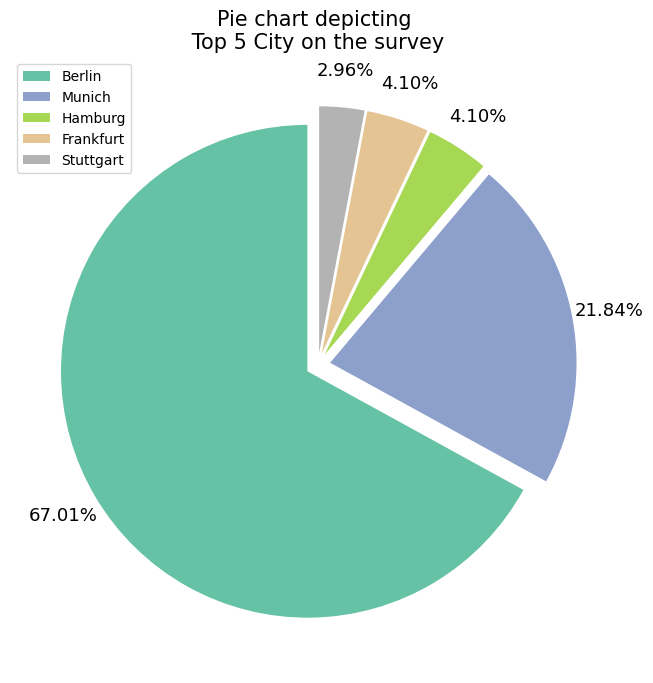

In [46]:
# Top 5 City on the survey 
plt.figure(figsize=(9,8))

df_1['city'].value_counts().iloc[:5].plot.pie(autopct="%1.2f%%",fontsize=13,startangle=90,labels=['']*5,
                                         cmap='Set2',explode=[0.05] * 5,pctdistance=1.15)
plt.ylabel("")
plt.title("Pie chart depicting \n Top 5 City on the survey ",fontsize=15);
plt.legend(loc='upper left',labels=df_1['city'].value_counts().iloc[:5].index)
plt.show()

**Insights:** The most suitable cities to work as an IT specialist are Berlin and Munich.

### 8) Which city has the highest (average) salary?

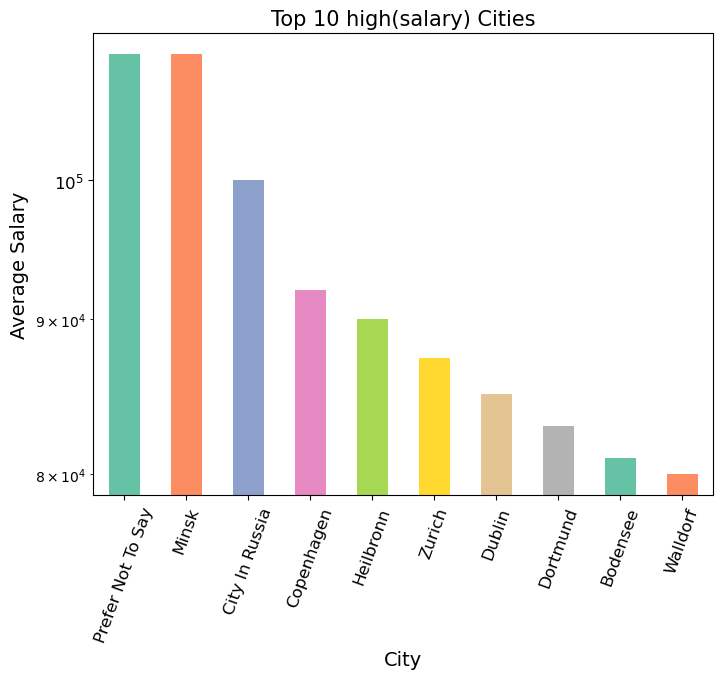

In [47]:
city_salary_df = df_1.groupby('city')['salary_EUR'].mean().sort_values(ascending = False)[:10]
custom_palette = sns.color_palette("Set2")[:15]
plt.figure(figsize=(8, 6))

city_salary_df.plot(kind='bar', color=custom_palette)

# Adding labels and title
plt.xticks(rotation=70,fontsize=12)
plt.xlabel('City',fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Average Salary',fontsize=14)
plt.title('Top 10 high(salary) Cities',fontsize=15)

plt.yscale('log')
# Displaying the plot
plt.show()

**Insights:** Employees with the highest annual salary do not want to say their city, but Minsk is in second place.

### 9) Which Age Has The Highest Chance To Get an IT Opportunity ?

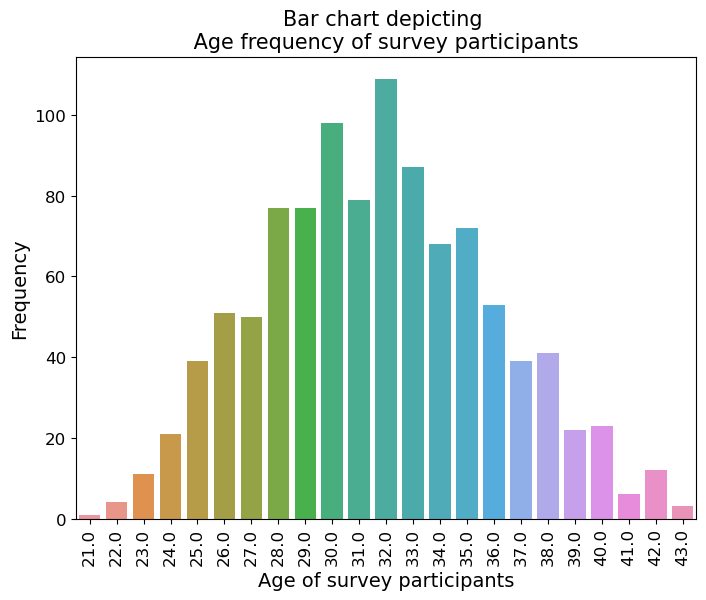

In [48]:
# Using count plot
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_1,x='age')

plt.title("Bar chart depicting \n Age frequency of survey participants ",fontsize=15);
plt.xticks(fontsize=12,rotation=90)
plt.xlabel("Age of survey participants",fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Frequency",fontsize=14)
plt.show()

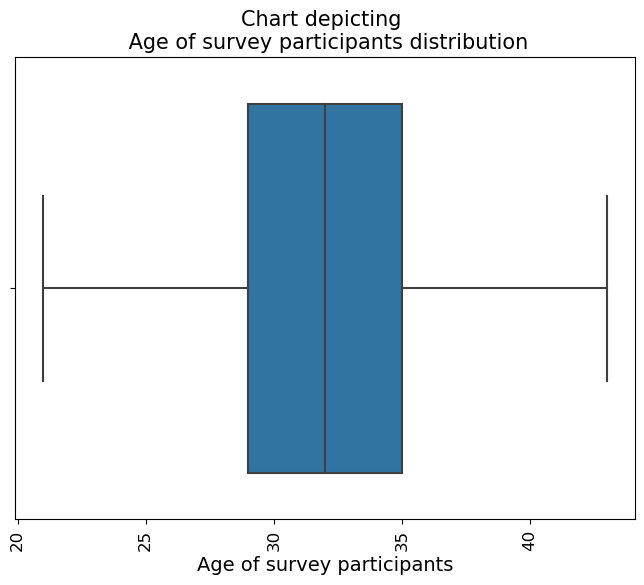

In [49]:
# Age of survey participants distribution
plt.figure(figsize=(8,6))

ax = sns.boxplot(data=df_1,x='age')
ax.set(xlabel="")

plt.title("Chart depicting \n Age of survey participants distribution",fontsize=15);
plt.xticks(fontsize=12,rotation=90)
plt.xlabel("Age of survey participants",fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [50]:
df_1['age'].describe()

count    1043.000000
mean       31.689358
std         4.264903
min        21.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        43.000000
Name: age, dtype: float64

**Insights:** The average age of employees is 31, with about 40% between the ages of 30 and 35.

### 10) Is the age proportional to the salary?

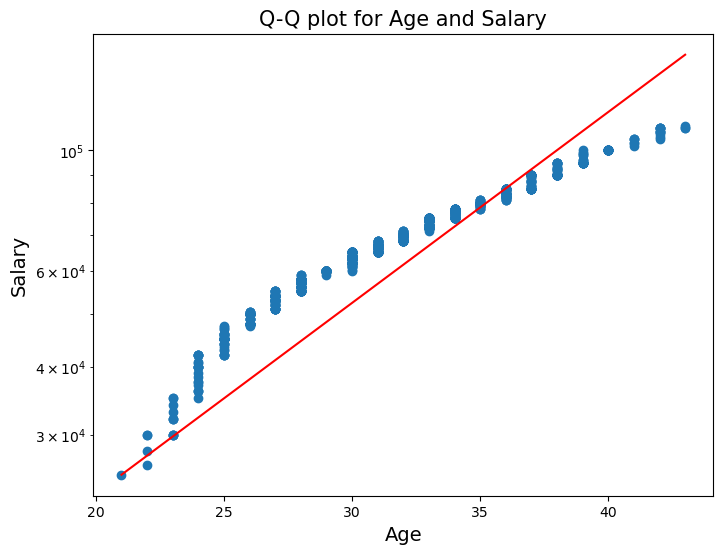

In [51]:
plt.figure(figsize=(8,6))

plt.scatter(np.sort(df['age']), np.sort(df['salary_EUR']))
plt.xlabel('Age',fontsize=14)
plt.ylabel('Salary',fontsize=14)
plt.title('Q-Q plot for Age and Salary',fontsize=15)
# add the line y=x
x = np.array([df['age'].min(), df['age'].max()])
y = np.array([df['salary_EUR'].min(),150000])
plt.yscale('log')
plt.plot(x, y, color='red')

plt.show()

**Insights:** From the result obtained from the graph, it can be concluded that as the age increases, their salary also increases directly. Maybe it changes with their work experience.

### 11) What is The most Common Work Level ?

In [52]:
df_1['sen_level'].value_counts()

Senior    645
Middle    330
Junior     68
Name: sen_level, dtype: int64

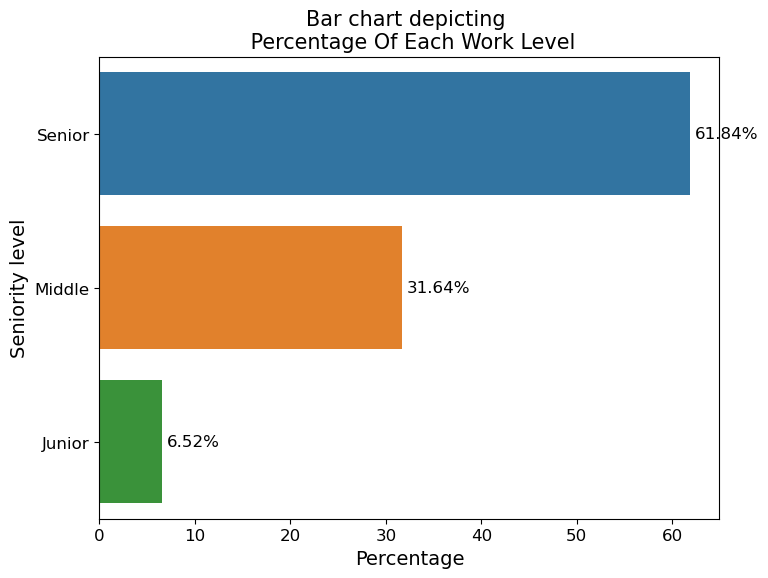

In [53]:
plt.figure(figsize=(8,6))
sen_level_counts = df_1['sen_level'].value_counts()
sen_level_perc = (sen_level_counts / sen_level_counts.sum()) * 100

ax = sns.barplot(data=sen_level_perc.reset_index(), y='index', x='sen_level')

plt.title("Bar chart depicting \n Percentage Of Each Work Level",fontsize=15);

plt.xticks(fontsize=12)
plt.xlabel("Percentage", fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Seniority level", fontsize=14)

# Add percentage values on the bars
for i, value in enumerate(sen_level_perc):
    ax.text(value+0.5, i, f'{value:.2f}%', va='center', fontsize=12)

plt.show()

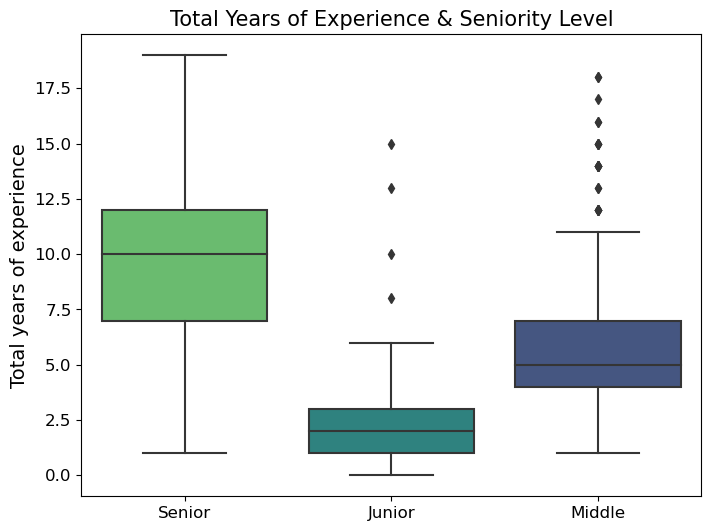

In [54]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_1[df_1['sen_level'].isin(['Senior','Junior','Middle','Self Employed'])],
           x='sen_level',y='tot_exp',palette='viridis_r')

plt.title("Total Years of Experience & Seniority Level",fontsize=15);
plt.xticks(fontsize=12)
plt.xlabel("")
plt.yticks(fontsize=12)
plt.ylabel("Total years of experience",fontsize=14)
plt.show()

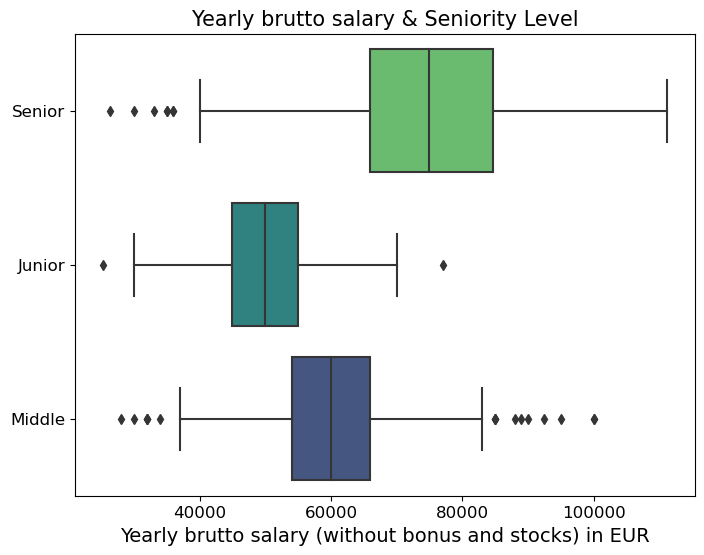

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_1[df_1['sen_level'].isin(['Senior','Junior','Middle','Self Employed'])],
           y='sen_level',x='salary_EUR',palette='viridis_r')

plt.title("Yearly brutto salary & Seniority Level",fontsize=15);
plt.xticks(fontsize=12)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("")

plt.show()

**Insights:** Most of the employees are at Senior level, the highest paid and experienced also belong to this category.

### 12) Is the number of years of experience proportional to the salary?

<Figure size 800x600 with 0 Axes>

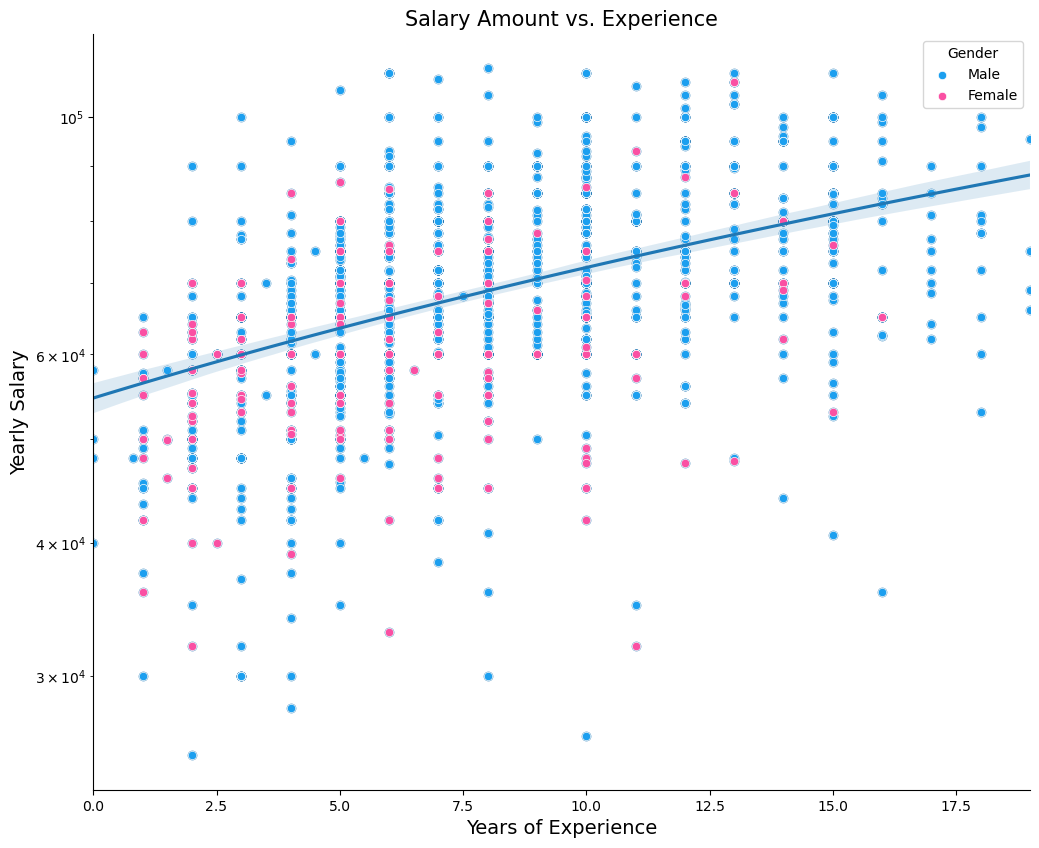

In [56]:
plt.figure(figsize=(8,6))
g = sns.FacetGrid(df_1,hue='gender',palette=["#1C9FEF", "#FA50A3", "#0C0B0B"])
sns.regplot(x='tot_exp', y="salary_EUR", data=df_1)
g=g.map(sns.scatterplot,'tot_exp',"salary_EUR")

g.fig.set_figwidth(15)
g.fig.set_figheight(10)

g.axes[0,0].set_ylabel('Yearly Salary',fontsize=14)
g.axes[0,0].set_xlabel('Years of Experience',fontsize=14)
plt.title('Salary Amount vs. Experience',fontsize=15)
plt.legend (title='Gender')

plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.show()

**Insights:** From the graph, we can see that as the work experience of employees increases, so does their salary.

### 13) What is the average salary for men and women and how does it relate to Covid-19?

In [57]:
# Filter the DataFrame based on "lost_job_COVID" values
df_covid_yes = df_1.query('lost_job_COVID == "Yes"')
df_covid_no = df_1.query('lost_job_COVID == "No"')

df_covid_yes_sum = df_covid_yes.groupby('gender')['salary_EUR'].mean().sort_index()
df_covid_no_sum = df_covid_no.groupby('gender')['salary_EUR'].mean().sort_index()

<Figure size 800x600 with 0 Axes>

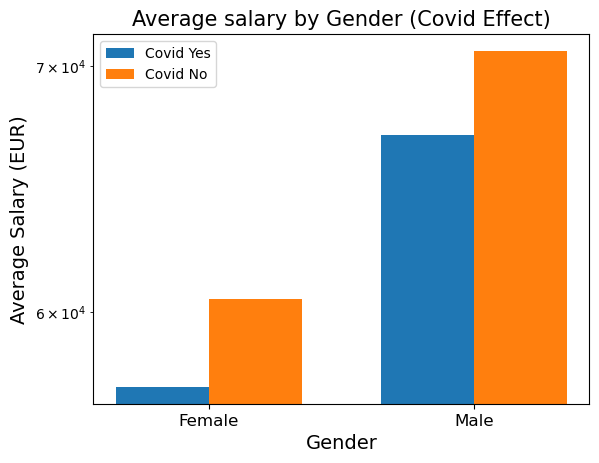

In [58]:
# Data
gender = list(df_covid_no_sum.index)
salary_covid_yes = list(df_covid_yes_sum.values)
salary_covid_no = df_covid_no_sum.values

# Set the width of the bars
bar_width = 0.35

# Create a numpy array for the x positions of the bars
x = np.arange(len(gender))

plt.figure(figsize=(8,6))

# Plotting
fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, salary_covid_yes, bar_width, label='Covid Yes')
bar2 = ax.bar(x + bar_width/2, salary_covid_no, bar_width, label='Covid No')

# Add labels, title, and legend
ax.set_xlabel('Gender',fontsize=14)
ax.set_ylabel('Average Salary (EUR)',fontsize=14)
ax.set_title('Average salary by Gender (Covid Effect)',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(gender,fontsize=12)
ax.legend()

plt.yscale('log')  # Set the y-axis scale to logarithmic
# Display the plot
plt.show()


**Insights:** Males predominate between the average salaries of disease-screened and non-infected workers.

### 14) Which tech-savvy workers earn the highest wages?

In [59]:
# Top 15 Salary and Technology

modi_new_df = df_1.copy()
modi_new_df['main_tech'] = modi_new_df['main_tech'].str.lower()
modi_new_df['main_tech'] = modi_new_df['main_tech'].str.strip()

top_tech_sal = modi_new_df['salary_EUR'].groupby(modi_new_df['main_tech']).sum().sort_values(ascending=False).index.to_list()[0:10]
top_tech_sal

['python',
 'java',
 'javascript',
 'php',
 'c++',
 'kotlin',
 'scala',
 'go',
 'c#',
 'typescript']

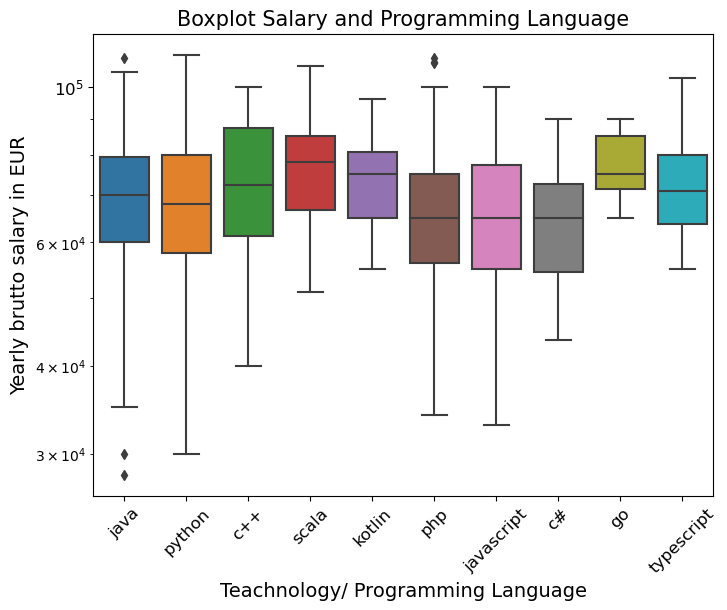

In [60]:
# Boxplot Salary and Programming Language

data = modi_new_df[modi_new_df['main_tech'].isin(top_tech_sal)]

plt.figure(figsize=(8,6))
sns.boxplot(data=data,y='salary_EUR', x='main_tech')

plt.xticks(rotation=45,fontsize=12)
plt.xlabel('Teachnology/ Programming Language',fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Yearly brutto salary in EUR",fontsize=14)
plt.title('Boxplot Salary and Programming Language',fontsize=15)

plt.yscale('log')
plt.show()

**Insights:** Employees who know Java, Python and C++ have higher annual salaries than those who know other programming languages.

### 15) Which programming language is most commonly used?

In [61]:
# Checking unique instance of 'Your main technology / programming language'
df_1['main_tech'].sample(100).unique()

array(['Scala / Python', 'C#', 'Ruby', 'Javascript / Typescript', 'Js',
       'Kubernetes', 'Scala', 'C++', 'Swift, Objective-C', 'Ios',
       'React.Js / Typescript', 'Java', 'Python', 'Php', 'Android',
       'Javascript', 'Qlik', 'Sql', 'Jenkins Bash', 'C', 'Dwh', 'C++/C',
       'Typescript', 'Aws', 'Test Management', 'R', 'Офмф', 'Go',
       'Qlik Bi Tool, Sql', 'C/C++', '.Net'], dtype=object)

In [62]:
from collections import Counter
import pandas as pd

programming_raw_list = df_1['main_tech'].str.replace(r'[,/]|(\s/)', ',',regex=True).str.lower().str.split(', ')
programming_list = [p1 for p in programming_raw_list for p1 in p]
programming_count = Counter(programming_list)

programming_df = pd.DataFrame.from_dict(programming_count, orient='index', columns=['Count']).reset_index().rename(columns={'index': 'Programming Language'})
programming_df.sort_values(by='Count', ascending=False, inplace=True)

programming_df.head(10)

,Programming Language,Count
1,python,288
0,java,176
9,javascript,82
10,php,66
42,typescript,38
2,c++,34
14,c#,27
7,kotlin,27
6,scala,25
41,swift,23


After taking a sample of the unique value of 'main_tech' column, we can see that there is a high variance in the input style. Some input more than one programming language, with different separators like dash or comma (even how they use the separation symbol varies). The same programming language can be input many multiple different ways (capitalization or using abbreviation instead)

After some modification, the order and count are different from before

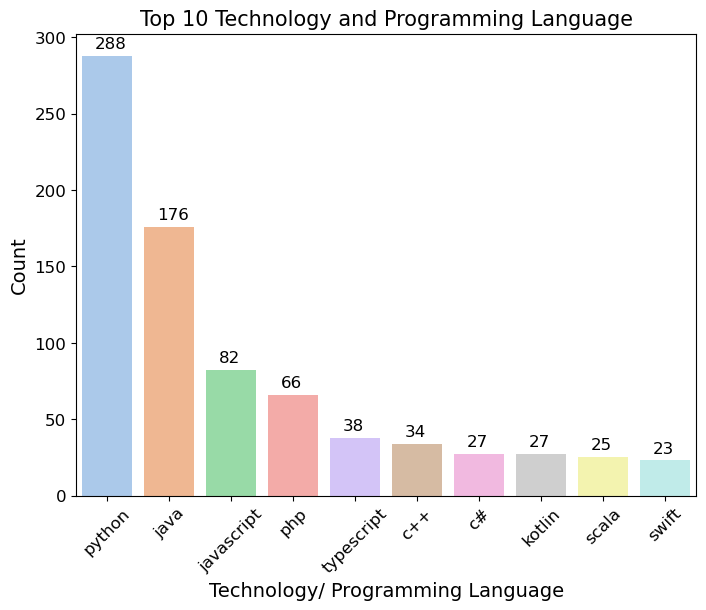

In [63]:
# Distribution Top 10 Technology and Programming Language
plt.figure(figsize=(8,6))
ax = sns.barplot(data=programming_df.head(10),x='Programming Language',y='Count',palette='pastel')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+0.2, p.get_height()+5), fontsize=12)

plt.xticks(rotation=45,fontsize=12)
plt.xlabel("Technology/ Programming Language",fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Count",fontsize=14)
plt.title('Top 10 Technology and Programming Language',fontsize=15)

plt.show()

**Insights:** Among the most popular programming languages, Python, Java and Javascript share the top 3.

### 16) Which city has the highest number of members?

In [64]:
df_1.city.value_counts().head(1)

Berlin    589
Name: city, dtype: int64

In [65]:
(df_1.city.value_counts().head(1)/len(df_1))*100

Berlin    56.471716
Name: city, dtype: float64

**Insights:** The majority of employees work in Berlin with 56%.

### 17) What technology do people with more experience often use?

In [66]:
df_1.groupby('main_tech')['tot_exp'].mean().sort_values(ascending=False).head(10)

main_tech
Kubrrnetes                     17.0
Linux                          17.0
Linux Kernel                   17.0
Oracle                         17.0
C# .Net                        17.0
Java/Scala/Go/Clouds/Devops    16.0
Sre                            16.0
Hardware                       15.0
Jenkins Bash                   15.0
Php/Mysql                      15.0
Name: tot_exp, dtype: float64

**Insights:** As the main technology, Linux and Oracle are widely used

<a id='conclusions'></a>
## Conclusions
>- The companies mainly employ young professionals.
>- Among the workers, the number of men is higher than women.
>- IT workers have not been affected much by the coronavirus as they can manage their work from home.
>- Regardless of the cities, every employee has knowledge of English.
>- Before the data was cleaned of outliers, it was obvious that the survey contained erroneous data. To avoid them, outliers were first cleaned.

### Limitations

>- When the survey was taken, the city of Berlin was preferred, which causes bias.
>- Data are not collected at the same rate. For certain reasons, Senior level employees have more data, which prevents the model from working accurately.

# Thank you for checking out my notebook!